<a href="https://colab.research.google.com/github/Slzl/PCA/blob/main/Bike_Dataset_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/bike_dataset[1].csv')

In [ ]:
df = df.drop(['model_name', 'links'], axis=1)

In [ ]:
df = pd.get_dummies(df, columns=['type_of_bike'])

In [ ]:
target = df['price']
df = df.drop('price', axis=1)

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_imputed)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, target], axis = 1)

In [ ]:
print(pca.explained_variance_ratio_)

[0.57164491 0.24765547]


In [ ]:
features = ['mileage', 'weight_in_kg']

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

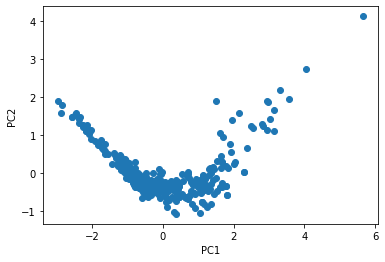

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()